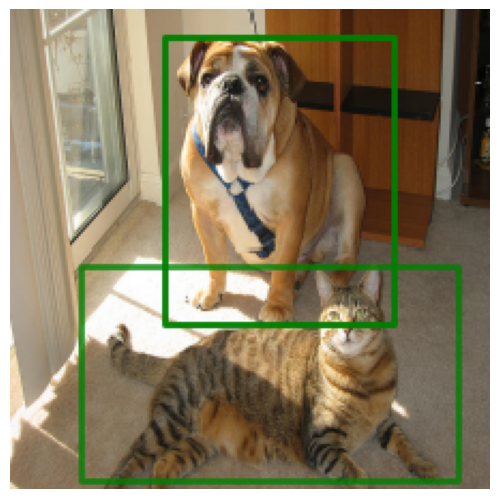

In [7]:
import torch
import mmcv
from mmengine.visualization import Visualizer

image = mmcv.imread('../data/image/cat_and_dog.png', channel_order='rgb')
visualizer = Visualizer(image=image)
# 绘制单个检测框, xyxy 格式
visualizer.draw_bboxes(torch.tensor([72, 13, 179, 147]))
# 绘制多个检测框
visualizer.draw_bboxes(torch.tensor([[33, 120, 209, 220], [72, 13, 179, 147]]))
visualizer.show()

# 绘制文本


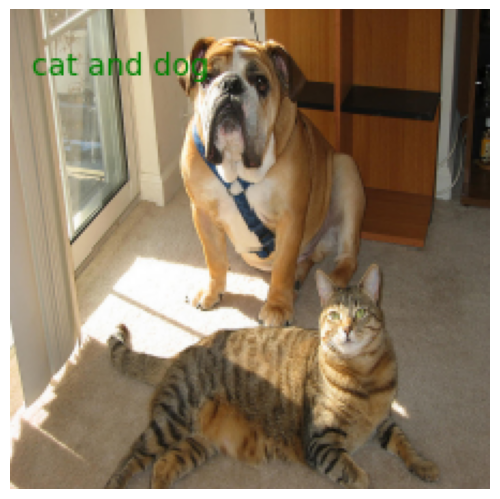

In [16]:
visualizer.set_image(image=image)
visualizer.draw_texts("cat and dog", torch.tensor([10, 20]))
visualizer.show()

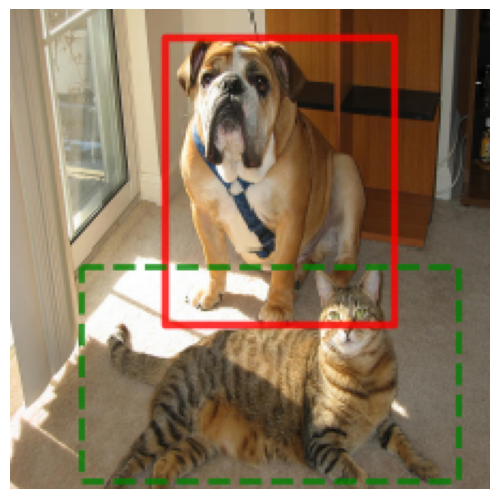

In [9]:
visualizer.set_image(image=image)
visualizer.draw_bboxes(torch.tensor([72, 13, 179, 147]), edge_colors='r', line_widths=3)
visualizer.draw_bboxes(torch.tensor([[33, 120, 209, 220]]),line_styles='--')
visualizer.show()

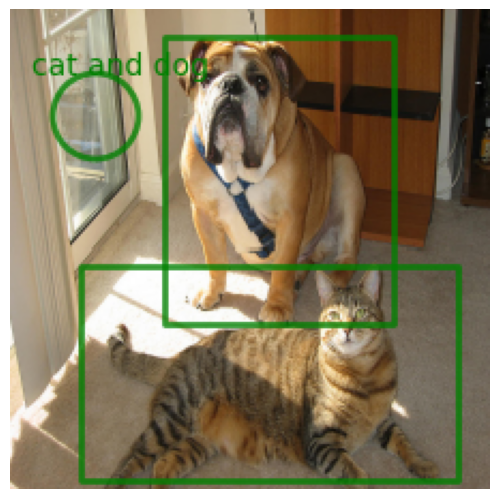

In [10]:
visualizer.set_image(image=image)
visualizer.draw_bboxes(torch.tensor([[33, 120, 209, 220], [72, 13, 179, 147]]))
visualizer.draw_texts("cat and dog",
                      torch.tensor([10, 20])).draw_circles(torch.tensor([40, 50]), torch.tensor([20]))
visualizer.show()

In [5]:
import numpy as np
from torchvision.models import resnet18
from torchvision.transforms import Compose, Normalize, ToTensor

def preprocess_image(img, mean, std):
    preprocessing = Compose([
        ToTensor(),
        Normalize(mean=mean, std=std)
    ])
    return preprocessing(img.copy()).unsqueeze(0)

model = resnet18(pretrained=True)

def _forward(x):
    x = model.conv1(x)
    x = model.bn1(x)
    x = model.relu(x)
    x = model.maxpool(x)

    x1 = model.layer1(x)
    x2 = model.layer2(x1)
    x3 = model.layer3(x2)
    x4 = model.layer4(x3)
    return x4

model.forward = _forward

image_norm = np.float32(image) / 255
input_tensor = preprocess_image(image_norm,
                                mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225])
feat = model(input_tensor)[0]

visualizer = Visualizer()
drawn_img = visualizer.draw_featmap(feat, channel_reduction='select_max')
visualizer.show(drawn_img)

NameError: name 'image' is not defined

/project/openmmlab2/mmengine/mmengine/visualization/visualizer.py:932: UserWarning: Since the spatial dimensions of overlaid_image: (224, 224) and featmap: torch.Size([7, 7]) are not same, the feature map will be interpolated. This may cause mismatch problems ！
  warnings.warn(


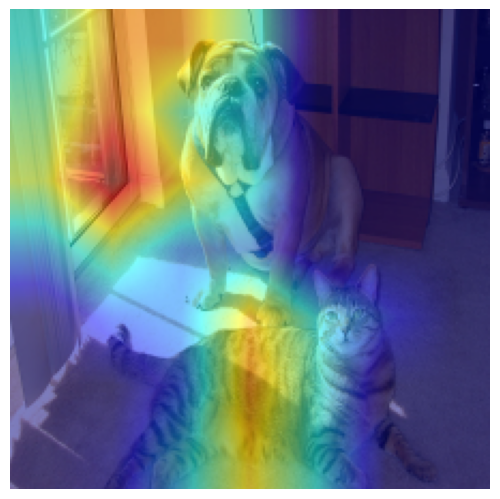

In [12]:
drawn_img = visualizer.draw_featmap(feat, image, channel_reduction='select_max')
visualizer.show(drawn_img)

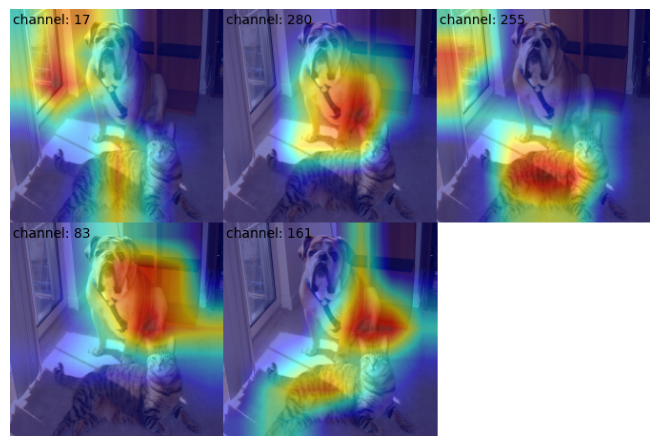

In [13]:
drawn_img = visualizer.draw_featmap(feat, image, channel_reduction=None, topk=5, arrangement=(2, 3))
visualizer.show(drawn_img)

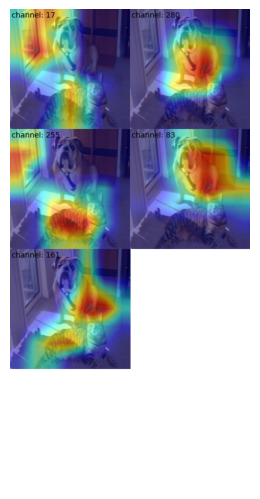

In [14]:
drawn_img = visualizer.draw_featmap(feat, image, channel_reduction=None, topk=5, arrangement=(4, 2))
visualizer.show(drawn_img)

In [19]:
visualizer = Visualizer(image=image, vis_backends=[dict(type='LocalVisBackend')], save_dir='temp_dir')

visualizer.draw_bboxes(torch.tensor([[33, 120, 209, 220], [72, 13, 179, 147]]))
visualizer.draw_texts("cat and dog", torch.tensor([10, 20]))
visualizer.draw_circles(torch.tensor([40, 50]), torch.tensor([20]))

# 会生成 temp_dir/vis_data/vis_image/demo_0.png
visualizer.add_image('demo', visualizer.get_image())

In [18]:
# 会生成 temp_dir/vis_data/vis_image/demo_1.png
visualizer.add_image('demo', visualizer.get_image(), step=1)
# 会生成 temp_dir/vis_data/vis_image/demo_3.png
visualizer.add_image('demo', visualizer.get_image(), step=3)

In [25]:
visualizer = Visualizer(image=image, vis_backends=[dict(type='WandbVisBackend')], save_dir='temp_dir')

visualizer.draw_bboxes(torch.tensor([[33, 120, 209, 220], [72, 13, 179, 147]]))
visualizer.draw_texts("cat and dog", torch.tensor([10, 20]))
visualizer.draw_circles(torch.tensor([40, 50]), torch.tensor([20]))

# 会生成 temp_dir/vis_data/vis_image/demo_0.png
visualizer.add_image('demo', visualizer.get_image())

wandb: WARNING Serializing object of type ndarray that is 150672 bytes


In [26]:
visualizer = Visualizer(vis_backends=[dict(type='LocalVisBackend')], save_dir='temp_dir')
drawn_img = visualizer.draw_featmap(feat, image, channel_reduction=None, topk=5, arrangement=(2, 3))
# 会生成 temp_dir/vis_data/vis_image/feat_0.png
visualizer.add_image('feat', drawn_img)

/project/openmmlab2/mmengine/mmengine/visualization/visualizer.py:932: UserWarning: Since the spatial dimensions of overlaid_image: (224, 224) and featmap: torch.Size([7, 7]) are not same, the feature map will be interpolated. This may cause mismatch problems ！
  warnings.warn(


In [3]:
# 会生成 temp_dir/vis_data/scalars.json
# 保存 loss
visualizer.add_scalar('loss', 0.2, step=0)
visualizer.add_scalar('loss', 0.1, step=1)
# 保存 acc
visualizer.add_scalar('acc', 0.7, step=0)
visualizer.add_scalar('acc', 0.8, step=1)

NameError: name 'visualizer' is not defined

In [2]:
# 会生成 temp_dir/vis_data/scalars.json
# 保存 loss
visualizer.add_scalar('loss', 0.2, step=0)
visualizer.add_scalar('loss', 0.1, step=1)
# 保存 acc
visualizer.add_scalar('acc', 0.7, step=0)
visualizer.add_scalar('acc', 0.8, step=1)

NameError: name 'visualizer' is not defined

In [8]:
visualizer = Visualizer(image=image, vis_backends=[dict(type='WandbVisBackend')],
                        save_dir='temp_dir')

# 获取 wandb 对象
wandb = visualizer.get_backend('WandbVisBackend').experiment
# 追加表格数据
table = wandb.Table(columns=["step", "mAP"])
table.add_data(1, 0.2)
table.add_data(2, 0.5)
table.add_data(3, 0.9)
# 保存
wandb.log({"table": table})

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: vansin. Use `wandb login --relogin` to force relogin


In [20]:
from mmengine.registry import VISUALIZERS
from typing import Optional

@VISUALIZERS.register_module()
class DetLocalVisualizer(Visualizer):
    def add_datasample(self,
                       name,
                       image: np.ndarray,
                       data_sample: Optional['BaseDataElement'] = None,
                       draw_gt: bool = True,
                       draw_pred: bool = True,
                       show: bool = False,
                       wait_time: int = 0,
                       step: int = 0) -> None:
        pass

visualizer_cfg = dict(
    type='DetLocalVisualizer', vis_backends=[dict(type='WandbVisBackend')], name='visualizer')

# 全局初始化
VISUALIZERS.build(visualizer_cfg)

# 任意代码位置
det_local_visualizer = Visualizer.get_current_instance()
det_local_visualizer.add_datasample('det', image, data_sample)

KeyError: 'DetLocalVisualizer is already registered in visualizer at __main__'